1. Import Libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  

2. Reading File

In [2]:
LF = pd.read_csv("LF_position.csv")


3. Selecting Features


In [3]:

# Drop unnecessary columns
LF = LF.drop(['Nationality', 'Overall', 'Club', 'Work Rate', 'Body Type',
                  'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 
                  'GKReflexes', 'Release Clause', 'Positioning'], axis=1)

# Convert categorical features
label_encoder = LabelEncoder()
LF['Preferred Foot'] = label_encoder.fit_transform(LF['Preferred Foot'])
LF['Position'] = label_encoder.fit_transform(LF['Position'])
    


4. Feature Engineering Functions

In [4]:
import NormalizeValue

LF['Height'] = LF['Height'].apply(NormalizeValue.convert_height_to_cm)
LF['Weight'] = LF['Weight'].apply(NormalizeValue.convert_weight_to_kg)
LF['Value'] = LF['Value'].apply(NormalizeValue.convert_value_wage).astype(int)
LF['Wage'] = LF['Wage'].apply(NormalizeValue.convert_value_wage).astype(int)
    
    # Create additional features
LF['Fitness'] = LF[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                         'Balance', 'Jumping', 'Stamina', 'Strength', 
                         'Aggression', 'Vision']].sum(axis=1)
    



Potential Prediction Model

In [5]:
import CombinedModle

# Define features and targets for potential prediction
x_potential = LF.drop(['ID', 'Potential'], axis=1)
y_potential = LF['Potential']

# Ensure x_potential contains only numeric values
x_potential = x_potential.select_dtypes(include=['number'])

# Split data into train and test
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_potential, y_potential, test_size=0.25, random_state=42)
print("Player Potential : ")
type='potential'
Combine_test_p, Combine_train_p , LF = CombinedModle.train_and_evaluate(LF, type, x_train_p, y_train_p, x_test_p, y_test_p)



Player Potential : 
Combined R^2 Test: 0.8849614955827203
Combined R^2 Train: 0.9762044622267619


C:\Users\goel6\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.1588e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Wage Prediction Model

In [6]:
import CombinedModle


x_Wage = LF[['International Reputation', 'Potential', 'Fitness', 'Skill Moves','Value']]
y_Wage = LF['Wage']

# Ensure x_Wage contains only numeric values
x_Wage = x_Wage.select_dtypes(include=['number'])

# Split data into test and train
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_Wage, y_Wage, test_size=0.25, random_state=42)
print("\nPlayer Wage : ")
type='wage'
Combine_test_w, Combine_train_w, LF = CombinedModle.train_and_evaluate(LF, type, x_train_w, y_train_w, x_test_w, y_test_w)


Player Wage : 
Combined R^2 Test: 0.9404632545871285
Combined R^2 Train: 0.958082242292168


Filtering Top 10 Players

In [7]:

# Get the top 10 players based on predicted potential
top_players = LF.nlargest(10, 'PredictedPotential')
    
# Display the top players' information in a table format
print("\nTop 10 Players' Information:")
print(top_players.to_string(index=False))
data= top_players


Top 10 Players' Information:
    ID            Name  Age  Potential     Value   Wage  Preferred Foot  International Reputation  Weak Foot  Skill Moves  Position  Height  Weight  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  Fitness  PredictedPotential  PredictedWage
190871       Neymar Jr   26         93 118500000 290000               1                       5.0        5.0          5.0         2  175.26   68.04      79.0       87.0             62.0          84.0     84.0       96.0   88.0        87.0         78.0         95.0          94.0         90.0     96.0       94.0     84.0       80.0     61.0     81.0      49.0       82.0        56.0           36.0    87.0       81.0       94.0     27.0            24.0      

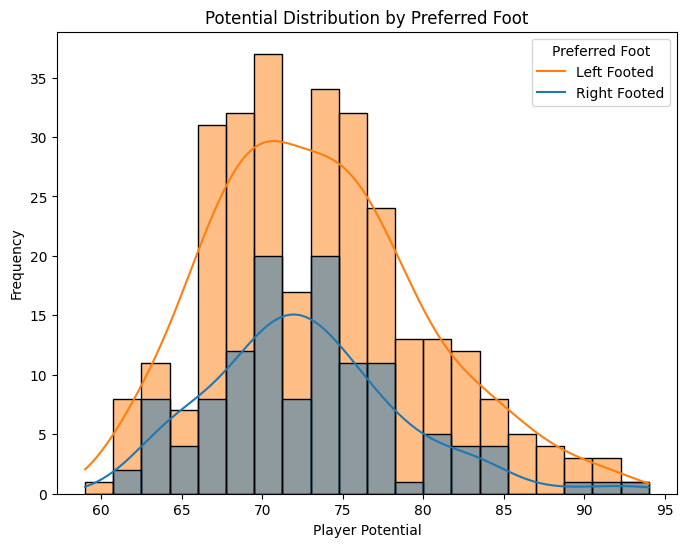

T-Test for Player Potential by Preferred Foot
T-statistic: -0.947, P-value: 0.344
Fail to reject H0: No significant difference in Potential between groups.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

plt.figure(figsize=(8, 6))
sns.histplot(data=LF, x='Potential', hue='Preferred Foot', kde=True, bins=20)
plt.title("Potential Distribution by Preferred Foot")
plt.xlabel("Player Potential")
plt.ylabel("Frequency")
plt.legend(title="Preferred Foot", labels=["Left Footed", "Right Footed"])
plt.show()

# Separate data for T-Test
left_footed = LF[LF['Preferred Foot'] == 0]['Potential']
right_footed = LF[LF['Preferred Foot'] == 1]['Potential']

# T-Test
t_stat, p_value = ttest_ind(left_footed, right_footed, equal_var=False)
alpha = 0.05

# Print results
print("T-Test for Player Potential by Preferred Foot")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Hypothesis Evaluation
if p_value < alpha:
    print("Reject H0: Significant difference in Potential between left and right-footed players.")
else:
    print("Fail to reject H0: No significant difference in Potential between groups.")